In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.D2WHN9_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


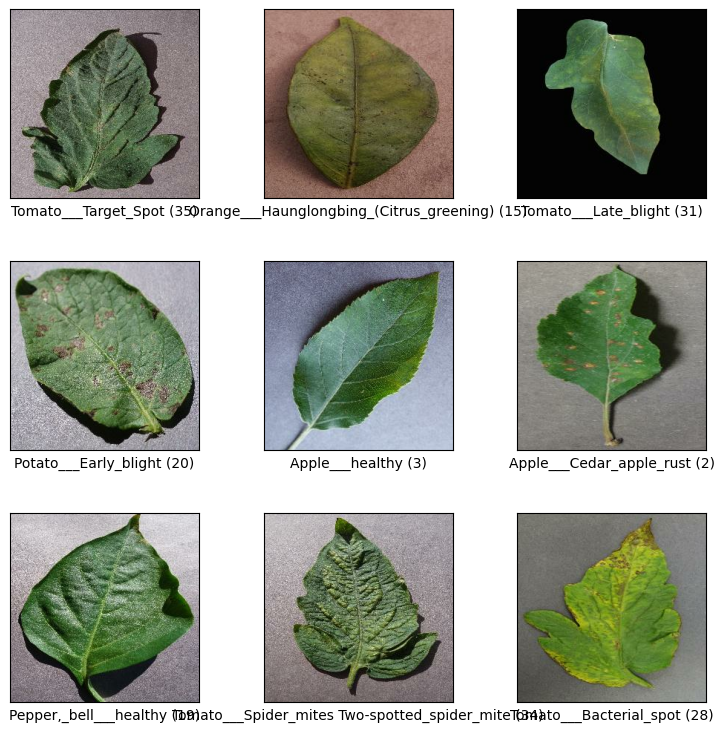

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
fig = tfds.show_examples(ds_train, ds_info)

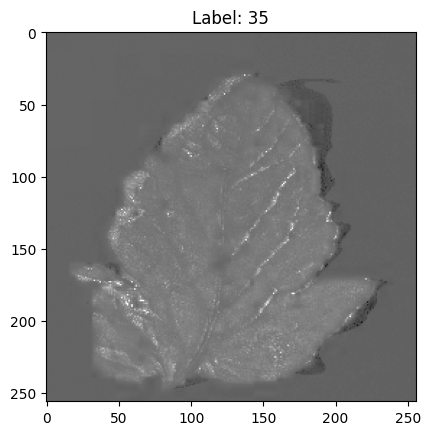

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the PlantVillage dataset
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Function to calculate NDVI
def calculate_ndvi(image, label):
    # Assuming the image is in RGB format and Red is at index 0, and near-infrared (NIR) information is not available
    # We will approximate NIR using a combination of channels (e.g., using Green channel)
    # This is a workaround, and ideally, you would need a dataset with NIR information
    NIR_approx = tf.cast(image[:, :, 1], tf.float32)  # Using Green channel as an approximation
    RED = tf.cast(image[:, :, 0], tf.float32)
    ndvi = (NIR_approx - RED) / (NIR_approx + RED + 1e-10) # Completing the calculation by adding 1e-10
    ndvi = tf.expand_dims(ndvi, axis=-1) # Adding a channel dimension
    return ndvi, label

# Create NDVI datasets
ds_train_ndvi = ds_train.map(lambda image, label: calculate_ndvi(image, label))
ds_validation_ndvi = ds_validation.map(lambda image, label: calculate_ndvi(image, label))
ds_test_ndvi = ds_test.map(lambda image, label: calculate_ndvi(image, label))

# Visualize examples from the NDVI dataset
for image, label in ds_train_ndvi.take(1):
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {label.numpy()}')
    plt.show()

In [ ]:
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=3
)

Epoch 1/3
1358/1358 [==============================] - 709s 521ms/step - loss: 0.9534 - accuracy: 0.7242 - val_loss: 0.5556 - val_accuracy: 0.8275
Epoch 2/3
1358/1358 [==============================] - 705s 519ms/step - loss: 0.3118 - accuracy: 0.9001 - val_loss: 0.4220 - val_accuracy: 0.8776
Epoch 3/3
1358/1358 [==============================] - 703s 518ms/step - loss: 0.1756 - accuracy: 0.9428 - val_loss: 0.5540 - val_accuracy: 0.8645


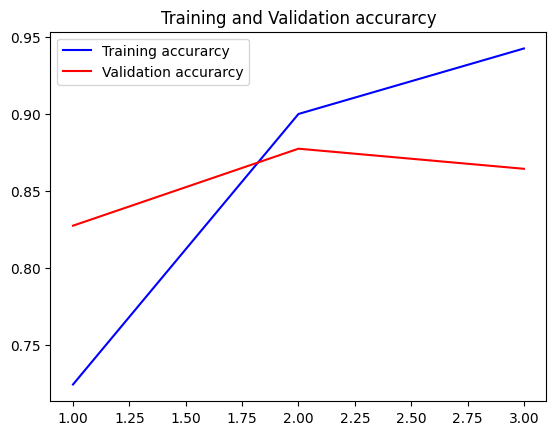

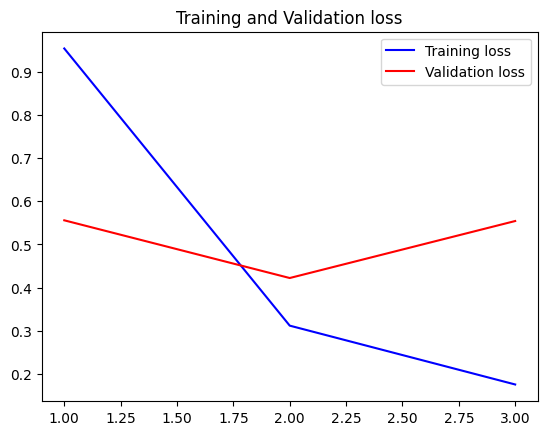

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

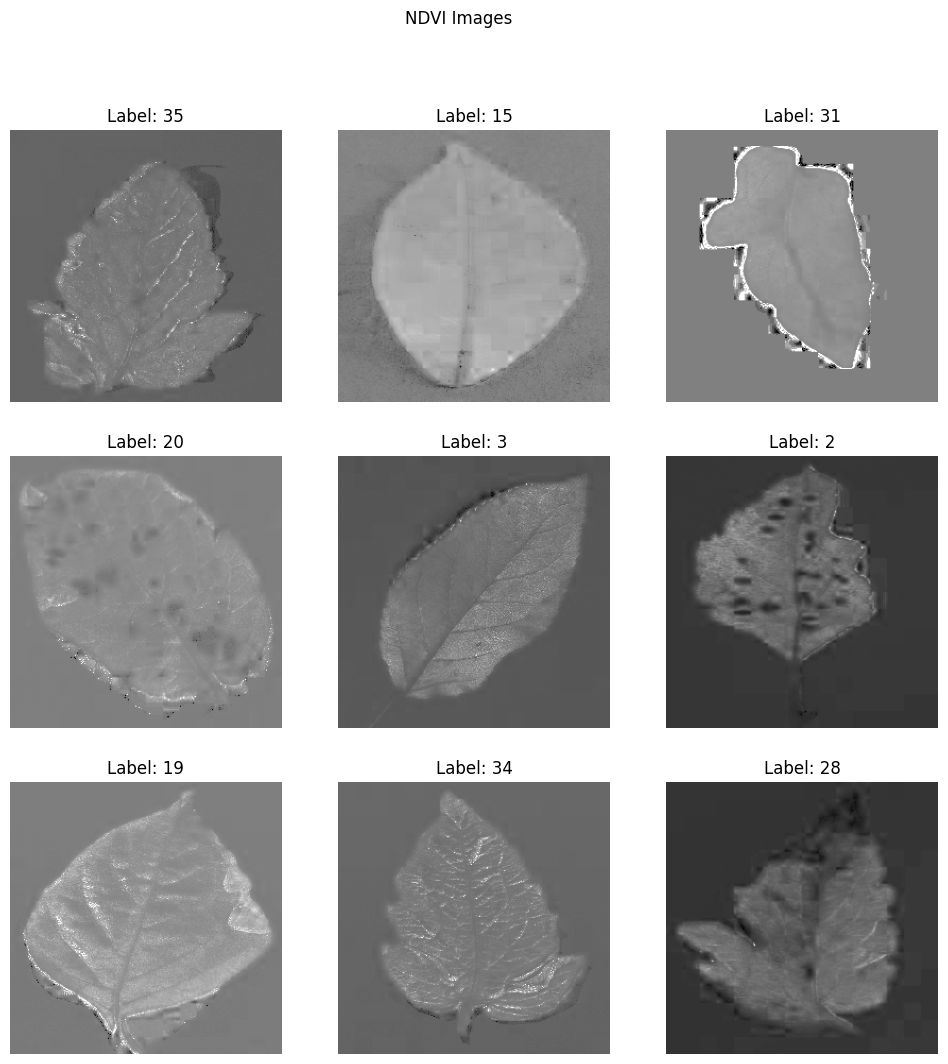

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the PlantVillage dataset
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'plant_village',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Function to calculate NDVI
def calculate_ndvi(image, label):
    NIR_approx = tf.cast(image[:, :, 1], tf.float32)  # Using Green channel as an approximation
    RED = tf.cast(image[:, :, 0], tf.float32)
    ndvi = (NIR_approx - RED) / (NIR_approx + RED + 1e-10) # Completing the calculation by adding 1e-10
    ndvi = tf.expand_dims(ndvi, axis=-1) # Adding a channel dimension
    return ndvi, label

# Create NDVI datasets
ds_train_ndvi = ds_train.map(lambda image, label: calculate_ndvi(image, label))
ds_validation_ndvi = ds_validation.map(lambda image, label: calculate_ndvi(image, label))
ds_test_ndvi = ds_test.map(lambda image, label: calculate_ndvi(image, label))

# Function to display a batch of NDVI images
def display_ndvi_batch(dataset):
    plt.figure(figsize=(12, 12))
    for i, (ndvi, label) in enumerate(dataset.take(9)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(ndvi.numpy().squeeze(), cmap='gray')
        plt.title(f'Label: {label.numpy()}')
        plt.axis('off')
    plt.suptitle("NDVI Images")
    plt.show()

# Displaying a batch of NDVI images from the training dataset
display_ndvi_batch(ds_train_ndvi)

In [ ]:
# Dump pickle file of the model
import pickle
print("[INFO] Saving model...")
pickle.dump(model,open('plant_disease_classification_model.pkl','wb'))

[INFO] Saving model...


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds  # Import tfds for loading dataset info

def predict_disease(image_path):
    """
    Predicts the disease of a plant based on an image.

    Args:
        image_path: The path to the image file.

    Returns:
        The predicted disease label.
    """

    # Load the image and preprocess it
    image = tf.image.decode_jpeg(tf.io.read_file(image_path))
    image = tf.image.resize(image, (224, 224))
    image_array = img_to_array(image.numpy())
    np_image = np.array(image_array, dtype=np.float16) / 255.0
    np_image = np.expand_dims(np_image, 0)

    # Display the image
    plt.imshow(plt.imread(image_path))
    plt.show()

    # Make the prediction
    result = model.predict(np_image)
    predicted_class_index = np.argmax(result)

    # Get image labels from dataset info
    _, info = tfds.load('plant_village', with_info=True, as_supervised=True)
    image_labels = info.features['label'].names

    # Print prediction
    print("Predicted Disease:", image_labels[predicted_class_index])

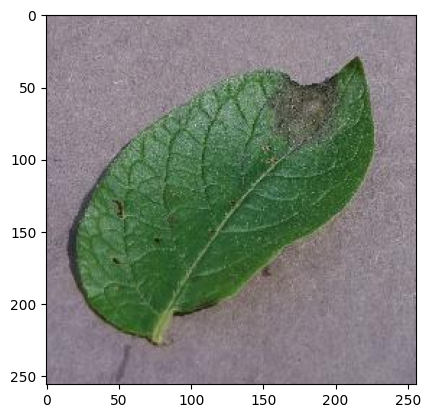

1/1 [==============================] - 0s 59ms/step
Predicted Disease: Potato___Late_blight


In [ ]:
predict_disease('/content/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.jpeg')

In [ ]:
# Save the model in SavedModel format (default behavior)
model.save('plant_disease_classification_model')  # No extension, TensorFlow will save in SavedModel format

# Load the model back
model = tf.keras.models.load_model('plant_disease_classification_model')  # Load the SavedModel format


In [ ]:
test_images = []
test_labels = []

for image_batch, label_batch in ds_test:
    resized_images = tf.image.resize(image_batch, (224, 224))  # Resize images to 224x224
    test_images.append(resized_images.numpy())

    label_batch_np = label_batch.numpy().flatten()
    test_labels.append(label_batch_np)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)


In [ ]:
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Test images shape: (1216320, 224, 3)
Test labels shape: (5430,)


In [ ]:
if len(test_images.shape) == 3:
    test_images = np.expand_dims(test_images, axis=-1)  # Add channels dimension if missing


In [ ]:

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=ds_test.element_spec[1].names,
            yticklabels=ds_test.element_spec[1].names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


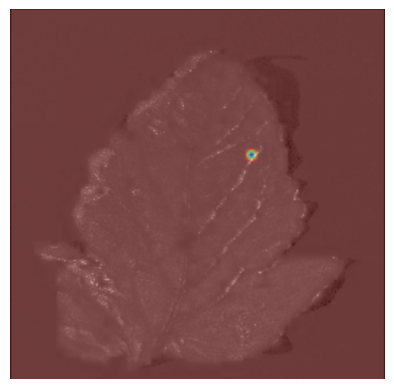

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the model using TensorFlow

model = tf.keras.models.load_model('plant_disease_classification_model')
# Function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to overlay Grad-CAM heatmap on original image
def overlay_heatmap(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    return cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

# Load an example NDVI image
img_path = '/content/ndvi_image.jpg'  # Provide the path to your NDVI image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.image.resize(img_array, (model.input_shape[1], model.input_shape[2]))
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Generate Grad-CAM heatmap and overlay it on the image
# Replace 'conv2d_2' with the actual name of your last convolutional layer
last_conv_layer_name = 'conv2d_2'
heatmap = generate_gradcam_heatmap(img_array, model, last_conv_layer_name)
overlayed_img = overlay_heatmap(img, heatmap)

# Display the overlayed Grad-CAM image
plt.imshow(overlayed_img)
plt.axis('off')
plt.show()

Enter grid size (rows, cols): 10,10
Enter number of obstacles: 4
Enter the coordinates of 4 obstacles:
2,4
3,7
5,5
8,1
Enter the start position (x, y): 9,9
Enter the goal position (x, y): 2,0


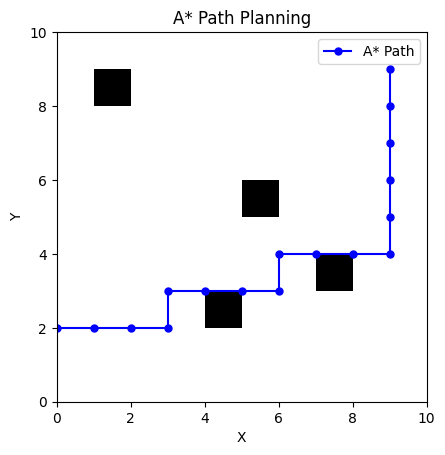

Path found by A*: [(9, 9), (8, 9), (7, 9), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (3, 6), (3, 5), (3, 4), (3, 3), (2, 3), (2, 2), (2, 1), (2, 0)]


In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# A* Algorithm
def a_star(start, goal, grid_size, obstacles):
    MOVES = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Directions (right, left, down, up)

    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def is_valid_move(node):
        return 0 <= node[0] < grid_size[0] and 0 <= node[1] < grid_size[1] and node not in obstacles

    open_list = []
    closed_list = set()
    came_from = {}

    heapq.heappush(open_list, (0, start))
    g_costs = {start: 0}
    f_costs = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        closed_list.add(current)

        for move in MOVES:
            neighbor = (current[0] + move[0], current[1] + move[1])
            if is_valid_move(neighbor) and neighbor not in closed_list:
                tentative_g_cost = g_costs[current] + 1
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    came_from[neighbor] = current
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)
                    f_costs[neighbor] = f_cost
                    heapq.heappush(open_list, (f_cost, neighbor))

    return None  # No path found

# Function to plot the grid with obstacles and A* path
def plot_a_star_grid(grid_size, obstacles, path_a_star=None):
    grid = np.zeros(grid_size)
    for obs in obstacles:
        grid[obs] = 1  # Mark obstacles with 1

    plt.imshow(grid, cmap='Greys', origin='lower', extent=[0, grid_size[1], 0, grid_size[0]])

    if path_a_star:
        path_a_star = np.array(path_a_star)
        plt.plot(path_a_star[:, 1], path_a_star[:, 0], marker='o', color='blue', label="A* Path", markersize=5)

    plt.title("A* Path Planning")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Input from the user
grid_size = tuple(map(int, input("Enter grid size (rows, cols): ").split(',')))
num_obstacles = int(input("Enter number of obstacles: "))
obstacles = []

print(f"Enter the coordinates of {num_obstacles} obstacles:")
for _ in range(num_obstacles):
    obs = tuple(map(int, input().split(',')))
    obstacles.append(obs)

start = tuple(map(int, input("Enter the start position (x, y): ").split(',')))
goal = tuple(map(int, input("Enter the goal position (x, y): ").split(',')))

# Calculate path using A*
path_a_star = a_star(start, goal, grid_size, obstacles)

# Plot the results
plot_a_star_grid(grid_size, obstacles, path_a_star)

# Output the path
if path_a_star:
    print(f"Path found by A*: {path_a_star}")
else:
    print("No path found by A*.")


Enter grid size (rows, cols): 10,10
Enter number of obstacles: 4
Enter the coordinates of 4 obstacles:
2,4
3,7
5,5
8,1
Enter the start position (x, y): 9,9
Enter the goal position (x, y): 2,0


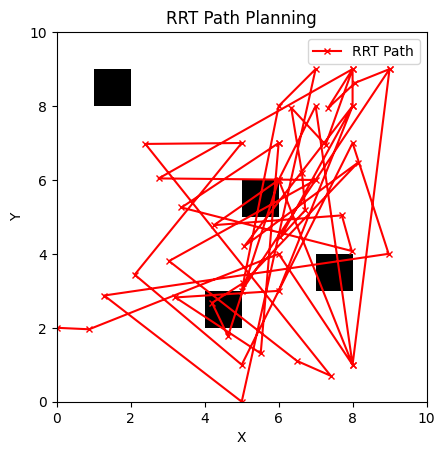

Path found by RRT: [(9, 9), (8.628609323645897, 8.07152330911474), (7.948757351835906, 7.338173940514707), (9.0, 8.0), (6.951084050771807, 7.269997813139621), (7.956841852834066, 6.338206620626897), (6.180702673145139, 6.632414459368495), (5.184545750362158, 6.720000903476831), (4.445087007719348, 6.0467990259325735), (8.0, 8.0), (4.212648701277326, 5.074187883852469), (6.469327537066019, 8.146302932091944), (3.2132103244933203, 5.040677721045445), (2.675679359244722, 4.197433710453665), (1.7737871234437184, 4.629394814028821), (6.0, 6.0), (4.777297991821628, 4.248856932846865), (5.041844804575121, 7.709766754611071), (4.078525522753178, 7.978124652333596), (5.254961238629229, 3.3703139215780813), (7.0, 6.0), (7.0, 6.0), (1.308085018758009, 5.514336365596663), (2.8216883070021863, 3.2081504410233377), (3.0, 6.0), (8.0, 8.0), (9.0, 8.0), (6.041452073175608, 2.752711972767571), (6.0, 7.0), (3.806441373778966, 3.0341924073665747), (1.1050330150931555, 6.493504320447969), (0.70162931318221

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# RRT Algorithm
def rrt(start, goal, space_size, obstacles, max_iterations=1000, step_size=1):
    def is_valid_move(node):
        return 0 <= node[0] < space_size[0] and 0 <= node[1] < space_size[1] and node not in obstacles

    tree = [start]
    for _ in range(max_iterations):
        random_point = (random.randint(0, space_size[0] - 1), random.randint(0, space_size[1] - 1))
        nearest_node = min(tree, key=lambda node: np.linalg.norm(np.array(node) - np.array(random_point)))

        direction = np.array(random_point) - np.array(nearest_node)
        length = np.linalg.norm(direction)
        if length > step_size:
            direction = direction / length * step_size

        new_node = tuple(np.array(nearest_node) + direction)

        if is_valid_move(new_node):
            tree.append(new_node)
            if np.linalg.norm(np.array(new_node) - np.array(goal)) < step_size:
                tree.append(goal)
                return tree
    return None  # No path found

# Function to plot the grid with obstacles and RRT path
def plot_rrt_grid(space_size, obstacles, path_rrt=None):
    grid = np.zeros(space_size)
    for obs in obstacles:
        grid[obs] = 1  # Mark obstacles with 1

    plt.imshow(grid, cmap='Greys', origin='lower', extent=[0, space_size[1], 0, space_size[0]])

    if path_rrt:
        path_rrt = np.array(path_rrt)
        plt.plot(path_rrt[:, 1], path_rrt[:, 0], marker='x', color='red', label="RRT Path", markersize=5)

    plt.title("RRT Path Planning")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

# Input from the user
grid_size = tuple(map(int, input("Enter grid size (rows, cols): ").split(',')))
num_obstacles = int(input("Enter number of obstacles: "))
obstacles = []

print(f"Enter the coordinates of {num_obstacles} obstacles:")
for _ in range(num_obstacles):
    obs = tuple(map(int, input().split(',')))
    obstacles.append(obs)

start = tuple(map(int, input("Enter the start position (x, y): ").split(',')))
goal = tuple(map(int, input("Enter the goal position (x, y): ").split(',')))

# Calculate path using RRT
path_rrt = rrt(start, goal, grid_size, obstacles)

# Plot the results
plot_rrt_grid(grid_size, obstacles, path_rrt)

# Output the path
if path_rrt:
    print(f"Path found by RRT: {path_rrt}")
else:
    print("No path found by RRT.")


Enter 3D grid size (x, y, z): 10,10,10
Enter number of obstacles: 10
Enter the coordinates of 10 obstacles (x, y, z):
1,2,3
5,7,6
3,4,5
2,8,9
5,3,4
1,2,9
3,7,5
7,5,7
4,8,2
1,4,5
Enter the start position (x, y, z): 7,8,2
Enter the goal position (x, y, z): 2,3,6


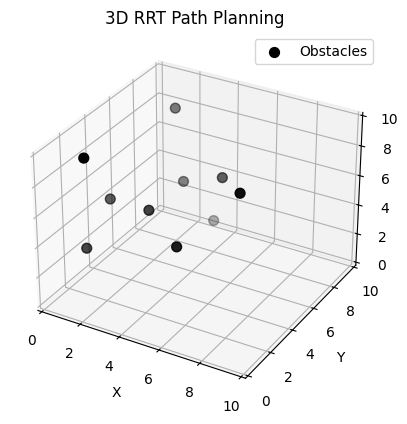

No path found by RRT.


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# RRT Algorithm for 3D
def rrt_3d(start, goal, space_size, obstacles, max_iterations=1000, step_size=1):
    def is_valid_move(node):
        return (0 <= node[0] < space_size[0] and
                0 <= node[1] < space_size[1] and
                0 <= node[2] < space_size[2] and
                node not in obstacles)

    tree = [start]
    for _ in range(max_iterations):
        # Generate random point in 3D space
        random_point = (random.randint(0, space_size[0] - 1),
                        random.randint(0, space_size[1] - 1),
                        random.randint(0, space_size[2] - 1))

        # Find the nearest node in the tree to the random point
        nearest_node = min(tree, key=lambda node: np.linalg.norm(np.array(node) - np.array(random_point)))

        # Calculate direction vector and limit it to step size
        direction = np.array(random_point) - np.array(nearest_node)
        length = np.linalg.norm(direction)
        if length > step_size:
            direction = direction / length * step_size

        # Calculate new node position
        new_node = tuple(np.array(nearest_node) + direction)

        # Add new node to the tree if the move is valid
        if is_valid_move(new_node):
            tree.append(new_node)
            # Check if new node is close to goal
            if np.linalg.norm(np.array(new_node) - np.array(goal)) < step_size:
                tree.append(goal)
                return tree
    return None  # No path found

# Function to plot the 3D grid with obstacles and RRT path
def plot_rrt_3d(space_size, obstacles, path_rrt=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot obstacles
    if obstacles:
        obs_x, obs_y, obs_z = zip(*obstacles)
        ax.scatter(obs_x, obs_y, obs_z, c='black', marker='o', s=50, label="Obstacles")

    # Plot path if found
    if path_rrt:
        path_rrt = np.array(path_rrt)
        ax.plot(path_rrt[:, 0], path_rrt[:, 1], path_rrt[:, 2], marker='x', color='red', label="RRT Path")

    # Set up the 3D space
    ax.set_xlim(0, space_size[0])
    ax.set_ylim(0, space_size[1])
    ax.set_zlim(0, space_size[2])
    ax.set_title("3D RRT Path Planning")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

# Input from the user
grid_size = tuple(map(int, input("Enter 3D grid size (x, y, z): ").split(',')))
num_obstacles = int(input("Enter number of obstacles: "))
obstacles = []

print(f"Enter the coordinates of {num_obstacles} obstacles (x, y, z):")
for _ in range(num_obstacles):
    obs = tuple(map(int, input().split(',')))
    obstacles.append(obs)

start = tuple(map(int, input("Enter the start position (x, y, z): ").split(',')))
goal = tuple(map(int, input("Enter the goal position (x, y, z): ").split(',')))

# Calculate path using 3D RRT
path_rrt = rrt_3d(start, goal, grid_size, obstacles)

# Plot the results in 3D
plot_rrt_3d(grid_size, obstacles, path_rrt)

# Output the path
if path_rrt:
    print(f"Path found by RRT: {path_rrt}")
else:
    print("No path found by RRT.")

Enter 3D grid size (x, y, z): 10,10,10
Enter number of obstacles: 4
Enter the coordinates of 4 obstacles (x, y, z):
3,3,3
7,7,7
2,8,5
8,2,1
Enter the start position (x, y, z): 1,1,1
Enter the goal position (x, y, z): 9,9,9


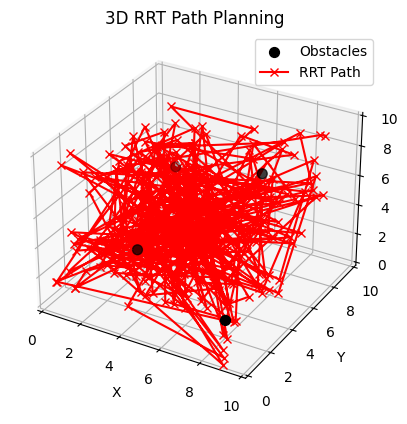

Path found by RRT: [(1, 1, 1), (1.0936585811581694, 1.749268649265355, 1.655610068107186), (1.879337521928294, 2.2710509537940142, 1.9879530065173419), (2.8592003641682076, 2.387749119527293, 2.1499725995053707), (3.3868272210114783, 3.23029197490555, 2.258284356894604), (1.4596448784865972, 2.8804783853523075, 2.660601719223449), (4.221313456038898, 3.4080611520859634, 1.7367185957538238), (1.0217302918061342, 2.0416257270301714, 2.983954517878981), (1.325737446410979, 3.4979544194174106, 1.8854938899570008), (3.579966056636854, 1.8397970540903943, 2.57452571814146), (1.1610731881147152, 3.7517445932780076, 0.9323536958136895), (4.716577900707776, 4.129770752063638, 1.2531398708838264), (5.575032861840077, 4.504589655998179, 1.6032339567531082), (3.945444219970261, 2.1384017767076577, 3.456149748982899), (5.439855393366665, 5.0912052661480285, 2.4017382948412864), (5.639203708689952, 5.5906536133236155, 3.244834729231411), (0.9048576032984161, 4.689212837850664, 1.1679526442729395), (

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# RRT Algorithm for 3D
def rrt_3d(start, goal, space_size, obstacles, max_iterations=1000, step_size=1):
    def is_valid_move(node):
        return (0 <= node[0] < space_size[0] and
                0 <= node[1] < space_size[1] and
                0 <= node[2] < space_size[2] and
                node not in obstacles)

    tree = [start]
    for _ in range(max_iterations):
        # Generate random point in 3D space
        random_point = (random.randint(0, space_size[0] - 1),
                        random.randint(0, space_size[1] - 1),
                        random.randint(0, space_size[2] - 1))

        # Find the nearest node in the tree to the random point
        nearest_node = min(tree, key=lambda node: np.linalg.norm(np.array(node) - np.array(random_point)))

        # Calculate direction vector and limit it to step size
        direction = np.array(random_point) - np.array(nearest_node)
        length = np.linalg.norm(direction)
        if length > step_size:
            direction = direction / length * step_size

        # Calculate new node position
        new_node = tuple(np.array(nearest_node) + direction)

        # Add new node to the tree if the move is valid
        if is_valid_move(new_node):
            tree.append(new_node)
            # Check if new node is close to goal
            if np.linalg.norm(np.array(new_node) - np.array(goal)) < step_size:
                tree.append(goal)
                return tree
    return None  # No path found

# Function to plot the 3D grid with obstacles and RRT path
def plot_rrt_3d(space_size, obstacles, path_rrt=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot obstacles
    if obstacles:
        obs_x, obs_y, obs_z = zip(*obstacles)
        ax.scatter(obs_x, obs_y, obs_z, c='black', marker='o', s=50, label="Obstacles")

    # Plot path if found
    if path_rrt:
        path_rrt = np.array(path_rrt)
        ax.plot(path_rrt[:, 0], path_rrt[:, 1], path_rrt[:, 2], marker='x', color='red', label="RRT Path")

    # Set up the 3D space
    ax.set_xlim(0, space_size[0])
    ax.set_ylim(0, space_size[1])
    ax.set_zlim(0, space_size[2])
    ax.set_title("3D RRT Path Planning")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

# Input from the user
grid_size = tuple(map(int, input("Enter 3D grid size (x, y, z): ").split(',')))
num_obstacles = int(input("Enter number of obstacles: "))
obstacles = []

print(f"Enter the coordinates of {num_obstacles} obstacles (x, y, z):")
for _ in range(num_obstacles):
    obs = tuple(map(int, input().split(',')))
    obstacles.append(obs)

start = tuple(map(int, input("Enter the start position (x, y, z): ").split(',')))
goal = tuple(map(int, input("Enter the goal position (x, y, z): ").split(',')))

# Calculate path using 3D RRT
path_rrt = rrt_3d(start, goal, grid_size, obstacles)

# Plot the results in 3D
plot_rrt_3d(grid_size, obstacles, path_rrt)

# Output the path
if path_rrt:
    print(f"Path found by RRT: {path_rrt}")
else:
    print("No path found by RRT.")

Enter grid size (rows, cols, height): 10,10,10
Enter number of obstacles: 10
Enter the coordinates of 10 obstacles:
1,2,3
5,7,6
3,4,5
2,8,9
5,3,4
1,2,9
3,7,5
7,5,7
4,8,2
1,4,5
Enter the start position (x, y, z): 7,8,2
Enter the goal position (x, y, z): 2,3,6


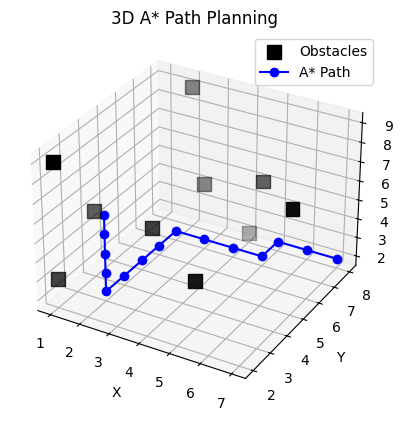

Path found by A* in 3D: [(7, 8, 2), (6, 8, 2), (5, 8, 2), (5, 7, 2), (4, 7, 2), (3, 7, 2), (2, 7, 2), (2, 6, 2), (2, 5, 2), (2, 4, 2), (2, 3, 2), (2, 3, 3), (2, 3, 4), (2, 3, 5), (2, 3, 6)]


In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# A* Algorithm for 3D space
def a_star_3d(start, goal, grid_size, obstacles):
    MOVES = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]  # Directions (6 primary axes)

    def heuristic(a, b):
        # Using Manhattan distance as heuristic in 3D
        return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

    def is_valid_move(node):
        return (0 <= node[0] < grid_size[0] and
                0 <= node[1] < grid_size[1] and
                0 <= node[2] < grid_size[2] and
                node not in obstacles)

    open_list = []
    closed_list = set()
    came_from = {}

    heapq.heappush(open_list, (0, start))
    g_costs = {start: 0}
    f_costs = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct the path by backtracking
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path from start to goal

        closed_list.add(current)

        for move in MOVES:
            neighbor = (current[0] + move[0], current[1] + move[1], current[2] + move[2])
            if is_valid_move(neighbor) and neighbor not in closed_list:
                tentative_g_cost = g_costs[current] + 1  # Assume uniform movement cost
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    came_from[neighbor] = current
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)
                    f_costs[neighbor] = f_cost
                    heapq.heappush(open_list, (f_cost, neighbor))

    return None  # No path found

# Function to plot the 3D grid with obstacles and A* path
def plot_a_star_3d(grid_size, obstacles, path_a_star=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot obstacles
    if obstacles:
        obs_x, obs_y, obs_z = zip(*obstacles)
        ax.scatter(obs_x, obs_y, obs_z, c='black', marker='s', s=100, label="Obstacles")

    # Plot the path
    if path_a_star:
        path_a_star = np.array(path_a_star)
        ax.plot(path_a_star[:, 0], path_a_star[:, 1], path_a_star[:, 2], marker='o', color='blue', label="A* Path")

    ax.set_title("3D A* Path Planning")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.legend()
    plt.show()

# Input from the user
grid_size = tuple(map(int, input("Enter grid size (rows, cols, height): ").split(',')))
num_obstacles = int(input("Enter number of obstacles: "))
obstacles = []

print(f"Enter the coordinates of {num_obstacles} obstacles:")
for _ in range(num_obstacles):
    obs = tuple(map(int, input().split(',')))
    obstacles.append(obs)

start = tuple(map(int, input("Enter the start position (x, y, z): ").split(',')))
goal = tuple(map(int, input("Enter the goal position (x, y, z): ").split(',')))

# Calculate path using A* in 3D
path_a_star = a_star_3d(start, goal, grid_size, obstacles)

# Plot the results
plot_a_star_3d(grid_size, obstacles, path_a_star)

# Output the path
if path_a_star:
    print(f"Path found by A* in 3D: {path_a_star}")
else:
    print("No path found by A* in 3D.")